# **1.** **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load dataset**
The creditcard.csv dataset contains details of 284,807 transactions out of which 492 are fraudulent transactions.

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* Data has 31 features from V1-V28 & Time, Amount and Class

* Input features: V1-V28, Time and Amount

* Target variable: Class

In [2]:
# Load dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')

Display the top 15 rows of the dataframe

In [3]:
# Display first few rows
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# **3. Data Cleaning**

### Check for duplicate rows and drop them

In [4]:
count_of_duplicate_rows = df.duplicated().sum()
print(count_of_duplicate_rows)

1081


In [5]:
df = df.drop_duplicates()

In [6]:
count_of_duplicate_rows_2 = df.duplicated().sum()
print(count_of_duplicate_rows_2)

0


### Checking for null values

In [7]:
null_value_percentage = df.isnull().sum()/len(df)
print(null_value_percentage)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


### Removal of outliers

In [8]:
import pandas as pd

# Calculate the IQR for 'Amount'
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]


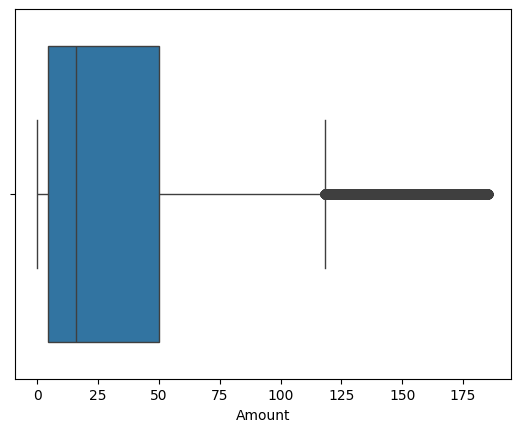

In [9]:
# Box plot to identify outliers
sns.boxplot(data=df, x='Amount')
plt.show()

# **4. Split data into train and test sets**
Split the data into training and test sets using the train_test_split function. Specify X as the input features, y as the target variable, set test_size to 0.2 for an 80/20 split, and use random_state for reproducibility.

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df['Class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (201632, 30)
X_test shape: (50409, 30)
y_train shape: (201632,)
y_test shape: (50409,)


# **5. Dealing with Imbalanced data**
How SMOTE Works

Identify Minority Class: SMOTE identifies the instances in the minority class. Choose Neighbors: For each instance in the minority class, it selects a number of its nearest neighbors (typically using Euclidean distance).
Generate Synthetic Samples: New samples are created by interpolating between the instance and its neighbors.

In [11]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

X_resampled shape: (402660, 30)
y_resampled shape: (402660,)


# **6. Scaling**
Scaling is a crucial preprocessing step in machine learning and data analysis.It helps improve model performance, ensures features contribute equally and helps us achieve more reliable and interpretable models.

In [12]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Convert back to DataFrame
processed_df = pd.DataFrame(X_resampled_scaled, columns=X.columns)
processed_df['Class'] = y_resampled

# Save the processed DataFrame to a CSV file
processed_df.to_csv('processed_data.csv', index=False)

# Display first few rows
processed_df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.800065,0.695793,-0.719278,0.578328,-0.628936,0.310526,0.342779,0.561161,-0.189006,0.198824,...,-0.316937,-0.717836,-0.225812,-0.750873,1.313890,-0.626847,-0.078119,-0.099263,0.325268,0
1,1.115347,0.280966,-0.403952,0.514098,-0.696600,0.803083,-0.603723,0.723923,-0.205721,0.456237,...,0.001085,0.710391,-0.127459,-0.312287,0.170139,-0.239313,-0.071559,0.611381,-0.785114,0
2,-0.188146,0.651025,-0.854078,0.669109,-0.638201,0.175608,0.516370,0.493152,-0.162658,0.254729,...,-0.184725,-0.258457,-0.286104,-0.734115,0.814643,-0.635538,-0.059302,-0.004931,2.993680,0
3,0.919472,0.833373,-0.588749,0.295966,-0.560222,0.494083,0.038142,0.594200,-0.204248,0.921694,...,-0.138442,0.156898,-0.043270,-1.197840,0.307601,1.469925,-0.153731,-0.234876,-0.637703,0
4,1.474026,0.146601,-0.586338,0.712397,-0.646486,1.110823,1.127869,0.944916,-0.381082,0.519083,...,-0.193608,0.867847,-0.303781,-2.947560,1.527561,-0.617730,-1.494509,-1.928064,-0.785114,0
5,1.213275,0.855575,-0.852554,0.401791,-1.084448,0.277334,0.106871,0.476442,-0.183538,0.280519,...,0.088530,1.155974,0.037729,-0.666485,0.105953,-0.161355,-0.145226,-0.337981,-0.541479,0
6,-0.218931,0.223246,-0.227889,0.504135,-0.671150,0.828462,3.288899,0.346941,-0.431538,0.169063,...,-0.765568,0.129716,0.006670,1.946755,0.446866,-0.601091,-0.109460,-0.001204,0.385316,0
7,-1.509135,0.690657,-1.000312,0.772679,-1.058767,-0.021260,0.603598,0.319825,-0.108103,0.477667,...,-0.385384,-1.030650,0.275057,0.295506,0.001765,-1.180453,-0.077942,-0.106423,0.482277,0
8,0.094551,0.461552,-0.402241,0.580509,-1.009522,0.681508,0.710938,0.690499,-0.115876,1.107740,...,-0.326128,-1.049652,0.028837,-0.723004,-0.675852,0.175515,0.120148,0.049369,-0.588484,0
9,-0.760522,0.140798,-0.834593,0.783525,-1.532179,0.222968,0.282861,0.413735,-0.018831,-0.420504,...,-0.294466,-0.616068,0.533240,-0.955877,0.028920,-1.262036,0.040984,-0.207005,-0.351986,0


Download processed data

In [14]:
from google.colab import files

# Download the CSV file
files.download('processed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>